In [19]:
#always run this first!!
#essential reticulate functions that allow us to use python packages in R
#you'll need a conda env with 'reticulate', leidenalg' and 'pandas' installed to do this
#then route reticulate to the python installed in that conda env with the below functions
#change the path to whichever conda env you installed reticulate in
Sys.setenv(RETICULATE_PYTHON="/home/rlmelton/.conda/envs/reticulate/bin/python")
library(reticulate)
reticulate::use_python("/home/rlmelton/.conda/envs/reticulate/bin/python")
reticulate::use_condaenv("/home/rlmelton/.conda/envs/reticulate")
reticulate::py_module_available(module='leidenalg') #needs to be TRUE
reticulate::import('leidenalg') #good to make sure this doesn't error

[1] TRUE

Module(leidenalg)

In [20]:
#if you get messages that any of these packages aren't installed
#go ahead and locally install them yourself using install.packages()
#library(formattable)
library(plyr)
suppressMessages(library(hdf5r))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(EnsDb.Hsapiens.v86))
suppressMessages(library(dplyr))
suppressMessages(library(ggplot2))
suppressMessages(library(Matrix))
suppressMessages(library(harmony))
suppressMessages(library(data.table))
#suppressMessages(library(ggpubr))
suppressMessages(library(SoupX))
suppressMessages(library(grid))
suppressMessages(library(ggplotify))
suppressMessages(library(patchwork))
suppressMessages(library(here))
#suppressMessages(library(rlist))
suppressMessages(library("stringr"))
suppressMessages(library(dplyr))
#suppressMessages(library(qpdf))
library(knitr)
opts_chunk$set(tidy=TRUE)
library(SoupX)
warnLevel <- getOption('warn')
options(warn = -1)

In [ ]:
# read in object

In [23]:
#old
#adata <- readRDS('/nfs/lab/projects/hpap_spleen/seurat_objects/020625_HPAP_spleen_objects.rds')
#new - going back to test some marker genes from Azimuth
adata <- readRDS("040625_HPAP_spleen_objects_celltypes.rds")


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



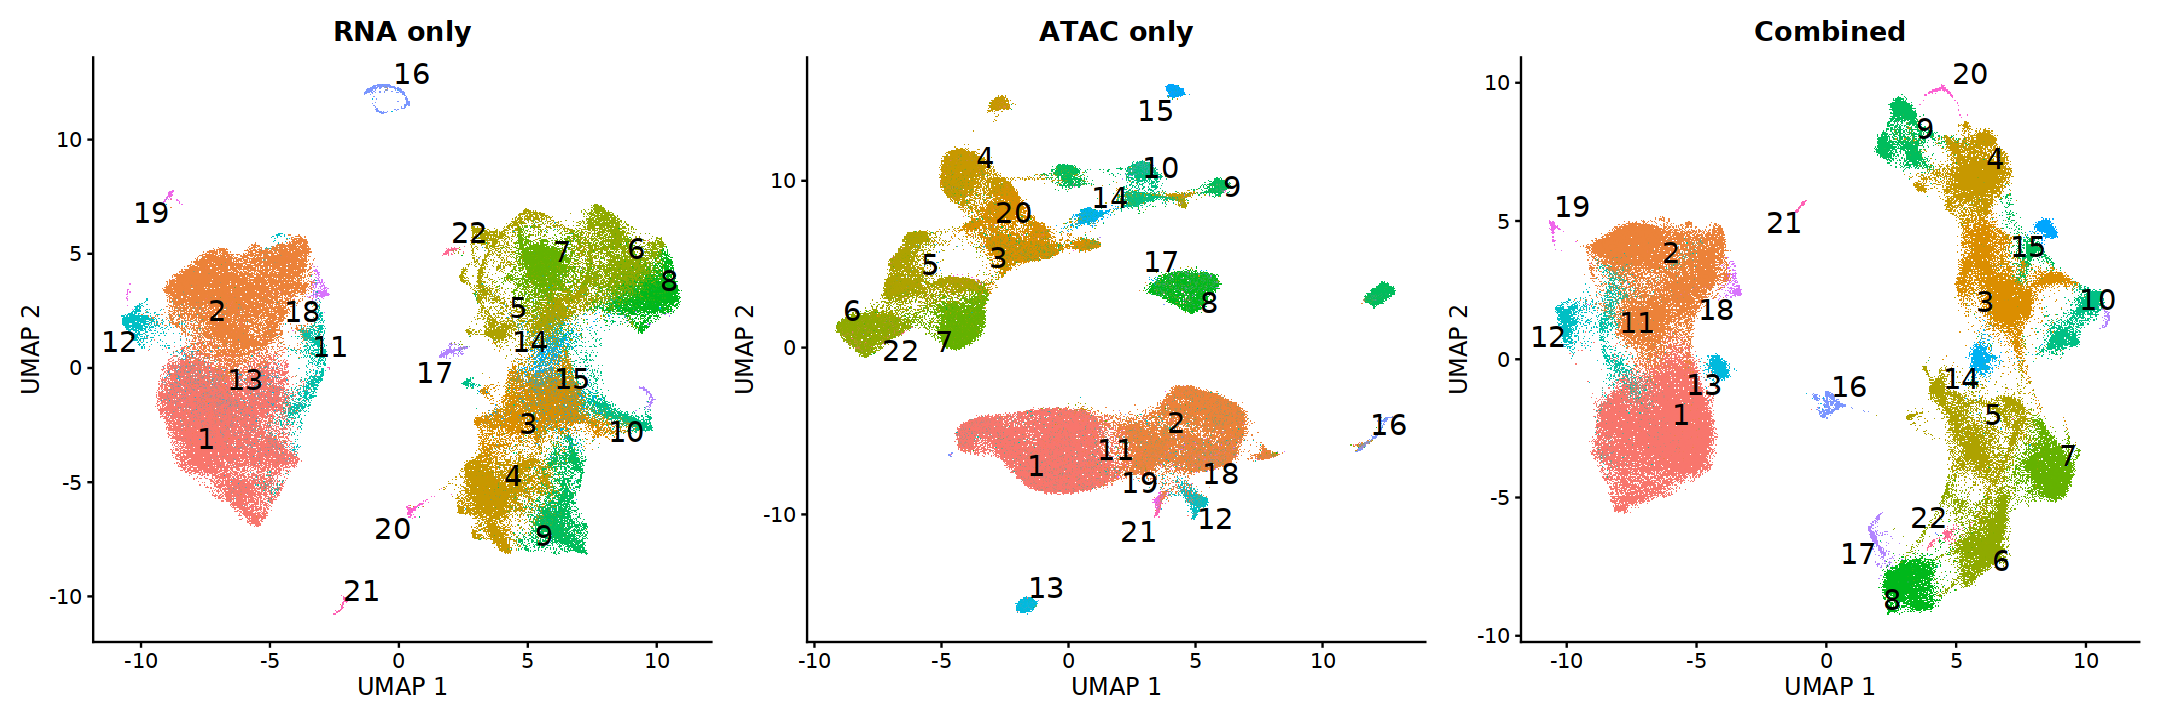

In [24]:
options(repr.plot.width=18, repr.plot.height=6)
p1 <- DimPlot(adata, reduction='umap.rna', group.by='seurat_clusters', label=TRUE, label.size=6, repel=TRUE) + ggtitle('RNA')
p1 <- p1 + xlab('UMAP 1') + ylab('UMAP 2') + ggtitle('RNA only')
p2 <- DimPlot(adata, reduction='umap.atac', group.by='seurat_clusters', label=TRUE, label.size=6, repel=TRUE) + ggtitle('ATAC')
p2 <- p2 + xlab('UMAP 1') + ylab('UMAP 2') + ggtitle('ATAC only')
p3 <- DimPlot(adata, reduction='umap.wnn', group.by='seurat_clusters', label=TRUE, label.size=6, repel=TRUE) + ggtitle('WNN')
p3 <- p3 + xlab('UMAP 1') + ylab('UMAP 2') + ggtitle('Combined')
p1 + p2 + p3 & NoLegend() & theme(plot.title=element_text(hjust=0.5))


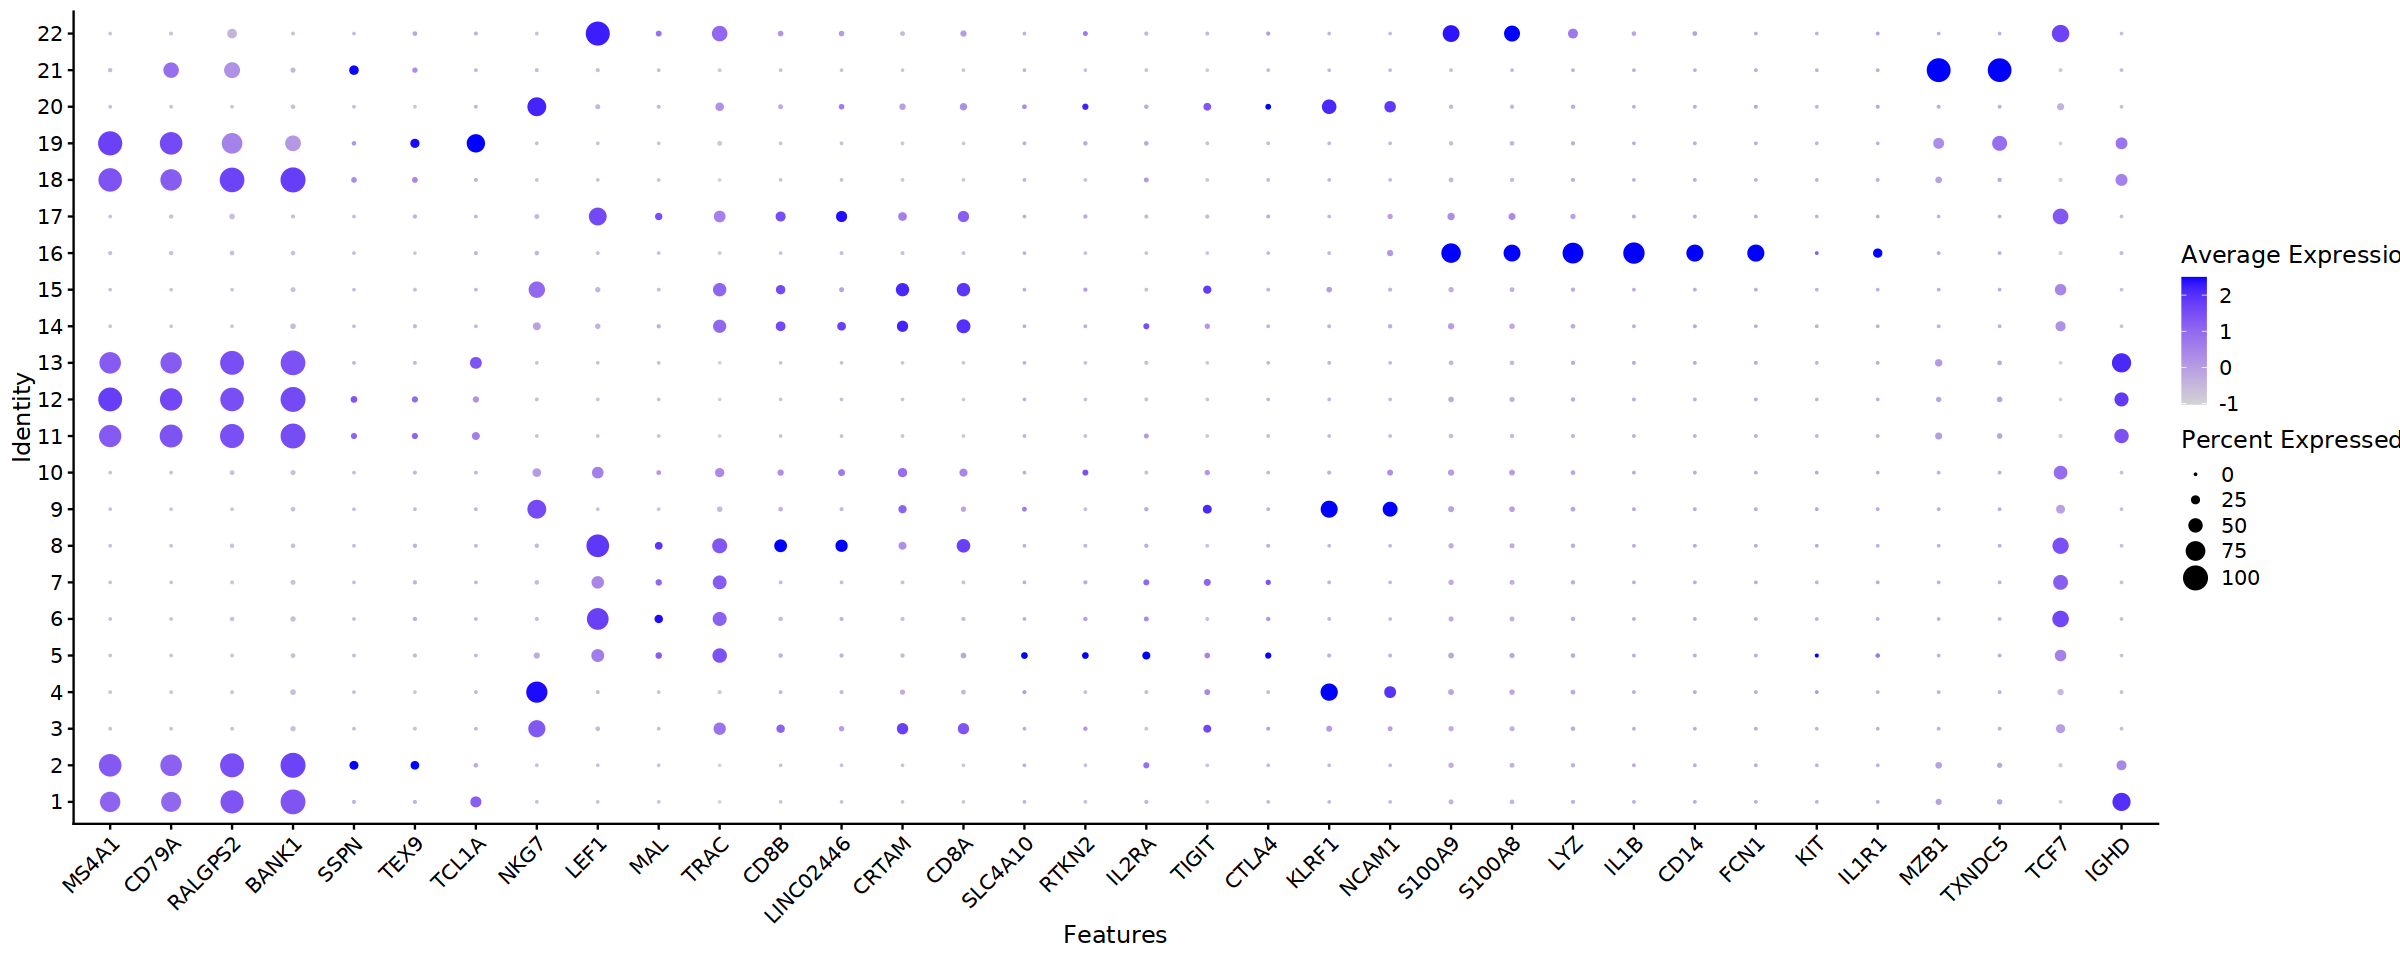

In [7]:
DefaultAssay(adata) <- 'SCT' 

marker.genes <- c( "MS4A1",
"CD79A",
"RALGPS2",
"BANK1",
'SSPN',
'TEX9',
'TCL1A',
'NKG7',
'LEF1',
'MAL',
'TRAC',
'CD8B',
'LINC02446',
'CRTAM',
'CD8A',
'SLC4A10',
'RTKN2',
'IL2RA',
'TIGIT',
'CTLA4',
'KLRF1',
'NCAM1',
'S100A9',
'S100A8',
'LYZ',
'VACN',
'IL1B',
'CD14',
'FCN1',
'KIT',
'IL1R1',
'MZB1',
'DELRL3',
'TXNDC5',
'TCF7',
"IGHD")

marker.genes <- unique(marker.genes)

options(repr.plot.width=20, repr.plot.height=8)

p1 <- DotPlot(adata, features = marker.genes, group.by = 'seurat_clusters') + theme(axis.text.x = element_text(angle = 45, hjust=1))
p1

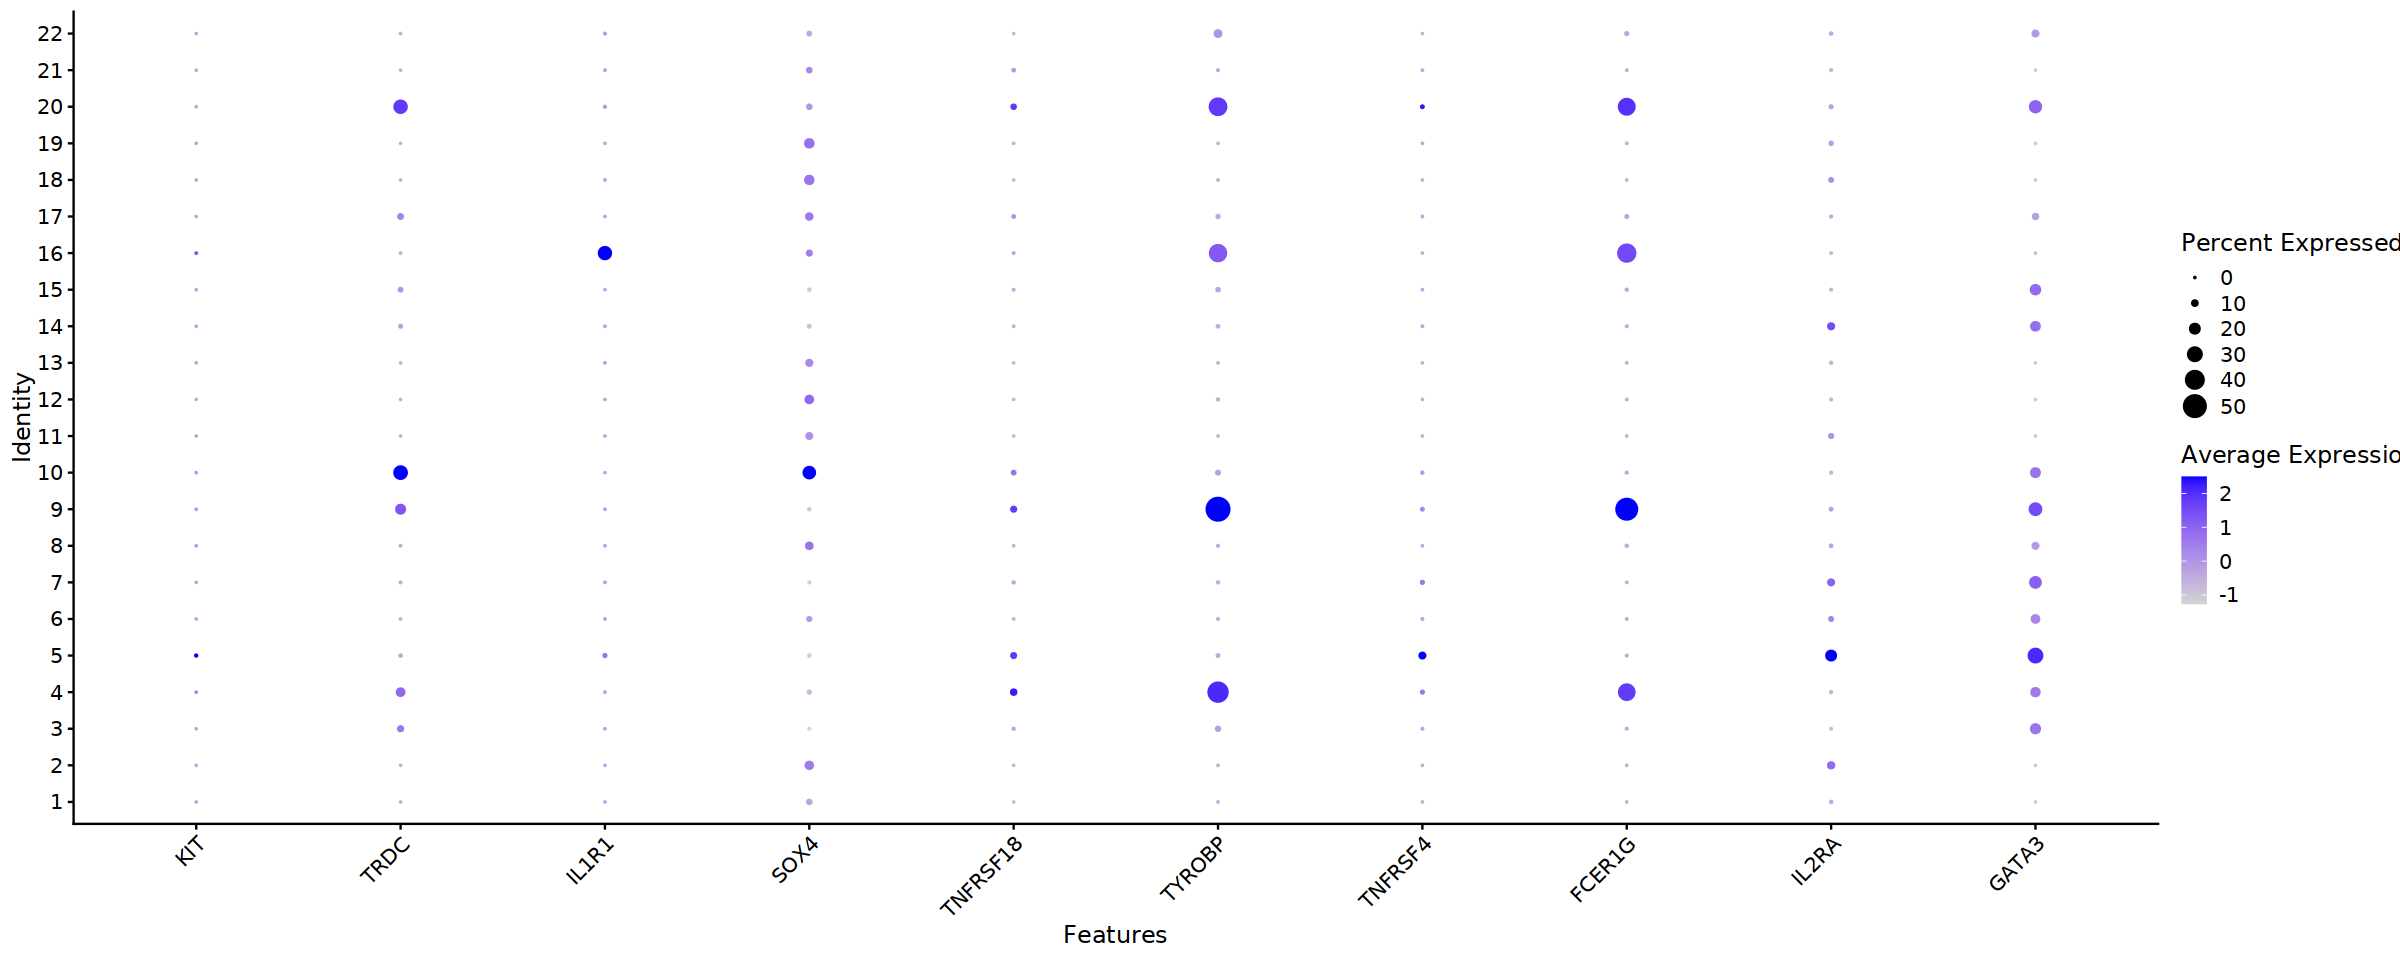

In [43]:
DefaultAssay(adata) <- 'SCT' 

#trying ILC markers from Azimuth
#https://azimuth.hubmapconsortium.org/references/human_pbmc/
marker.genes <- c('KIT', 'TRDC', 'IL1R1', 'SOX4', 'TNFRSF18', 'TYROBP', 'TNFRSF4', 'FCER1G', 'IL2RA', 'GATA3')

marker.genes <- unique(marker.genes)

options(repr.plot.width=20, repr.plot.height=8)

p1 <- DotPlot(adata, features = marker.genes, group.by = 'seurat_clusters') + theme(axis.text.x = element_text(angle = 45, hjust=1))
p1

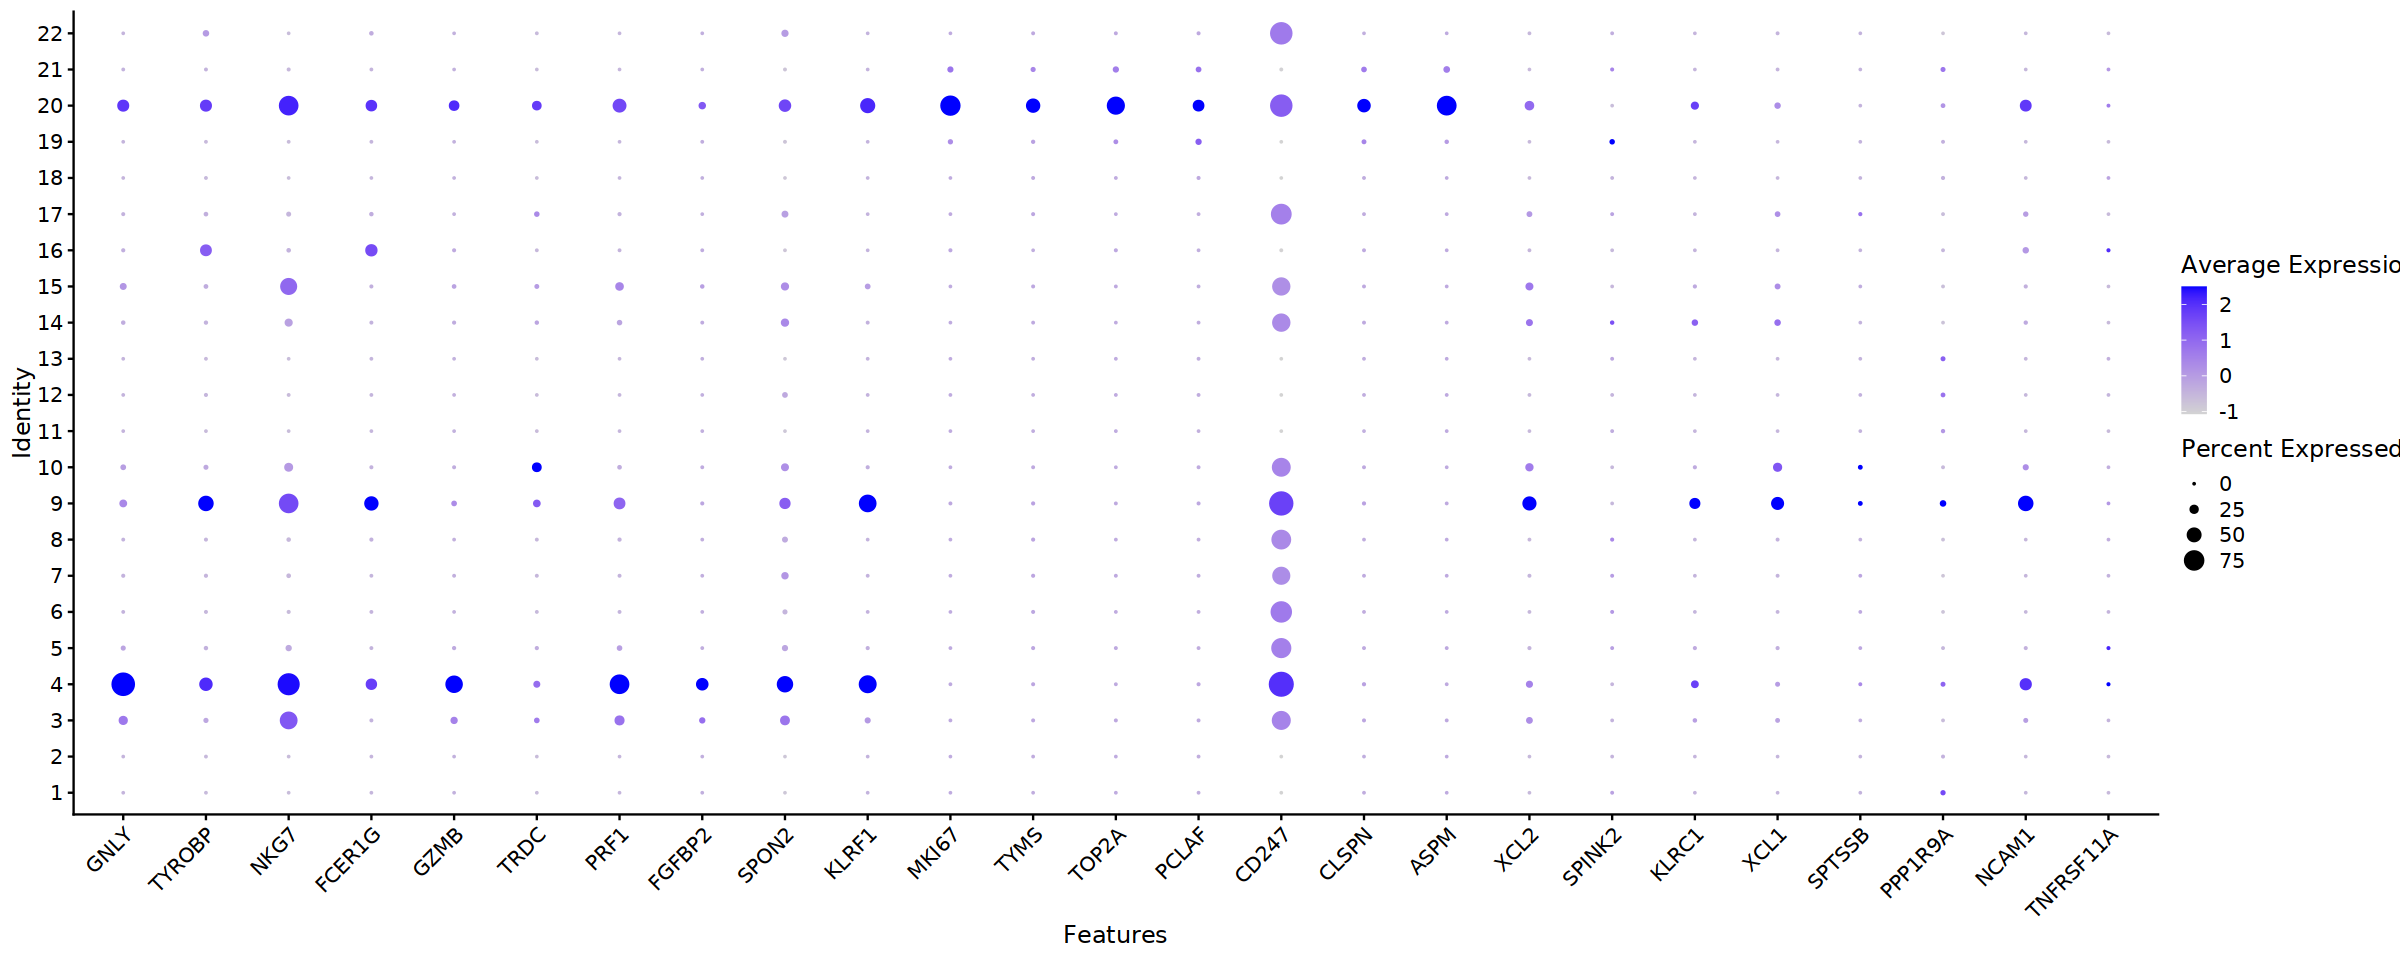

In [46]:
DefaultAssay(adata) <- 'SCT' 

#trying NK markers from Azimuth
#https://azimuth.hubmapconsortium.org/references/human_pbmc/
marker.genes <- c('GNLY', 'TYROBP', 'NKG7', 'FCER1G', 'GZMB', 'TRDC', 'PRF1', 'FGFBP2', 'SPON2', 'KLRF1',
                 #NK
                 'MKI67', 'KLRF1', 'TYMS', 'TRDC', 'TOP2A', 'FCER1G', 'PCLAF', 'CD247', 'CLSPN', 'ASPM',
                 #NK proliferating
                 'XCL2', 'FCER1G', 'SPINK2', 'TRDC', 'KLRC1', 'XCL1', 'SPTSSB', 'PPP1R9A', 'NCAM1', 'TNFRSF11A')
                 #NK bright)

marker.genes <- unique(marker.genes)

options(repr.plot.width=20, repr.plot.height=8)

p1 <- DotPlot(adata, features = marker.genes, group.by = 'seurat_clusters') + theme(axis.text.x = element_text(angle = 45, hjust=1))
p1

In [13]:
adata$og_clusters <- adata$seurat_clusters

In [27]:
table(adata$og_clusters)


    1     2     3     4     5     6     7     8     9    10    11    12    13 
29528 23104 12099  9313  8440  6958  6796  5803  5585  3112  1666  1516  1479 
   14    15    16    17    18    19    20    21    22 
 1403  1170   759   604   335   241   238   218   215 

In [15]:
adata@meta.data$celltype_major = as.vector(mapvalues(adata$seurat_clusters,from =  c('1','2','3','4','5','6','7','8','9','10',
                                                                                '11','12','13','14','15','16','17','18','19','20',
                                                                                '21','22'), 
                                                                             # make sure this list matches your number of clusters
             to = c("B Naive","B Memory","CD8 TEM","NK","TREG",
                "TREG","TREG","CD8 Naive","NK","CD8 TCM",
                "B memory","B memory","B naive", "CD8 TCM","CD8 TEM",
                "CD14 Mono","CD8 Naive","B intermediate","B Naive","NK",
                "Plasmablast","gdT"), warn_missing = TRUE))

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



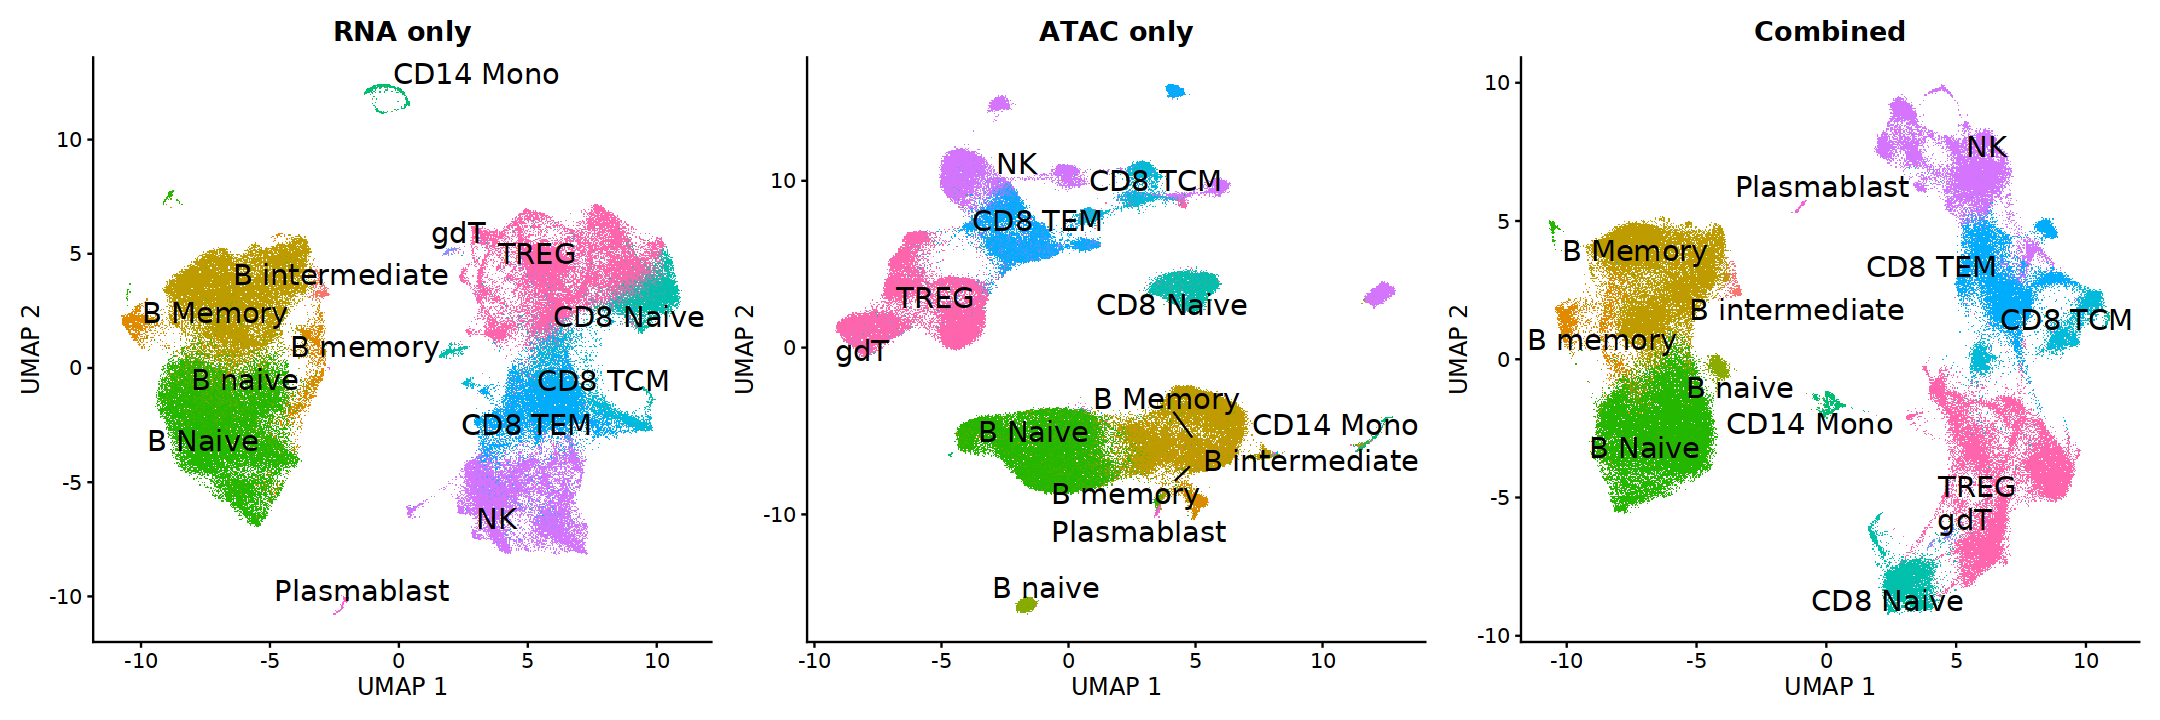

In [16]:
options(repr.plot.width=18, repr.plot.height=6)
p1 <- DimPlot(adata, reduction='umap.rna', group.by='celltype_major', label=TRUE, label.size=6, repel=TRUE) + ggtitle('RNA')
p1 <- p1 + xlab('UMAP 1') + ylab('UMAP 2') + ggtitle('RNA only')
p2 <- DimPlot(adata, reduction='umap.atac', group.by='celltype_major', label=TRUE, label.size=6, repel=TRUE) + ggtitle('ATAC')
p2 <- p2 + xlab('UMAP 1') + ylab('UMAP 2') + ggtitle('ATAC only')
p3 <- DimPlot(adata, reduction='umap.wnn', group.by='celltype_major', label=TRUE, label.size=6, repel=TRUE) + ggtitle('WNN')
p3 <- p3 + xlab('UMAP 1') + ylab('UMAP 2') + ggtitle('Combined')
p1 + p2 + p3 & NoLegend() & theme(plot.title=element_text(hjust=0.5))

In [17]:
saveRDS(adata,"040625_HPAP_spleen_objects_celltypes.rds")

In [28]:
## ## subcluster methods
#there is a difference between subset from main object and recluster vs. change resolution in main cluster to see if the groups resolve 
#try both see if one method or the other gets out CD14 v 16 clearer

In [29]:
#subclustering workaround #1: pass the 'igraph' method to leidenalg
FindSubCluster1 <- function(
  object,
  cluster,
  graph.name,
  subcluster.name = "sub.cluster",
  resolution = 0.5,
  algorithm = 1
) {
  sub.cell <- WhichCells(object = object, idents = cluster)
  sub.graph <- as.Graph(x = object[[graph.name]][sub.cell, sub.cell])
  sub.clusters <- FindClusters(
    object = sub.graph,
    resolution = resolution,
    algorithm = algorithm,
    method = 'igraph',group.singletons = FALSE
  )
  sub.clusters[, 1] <- paste(cluster,  sub.clusters[, 1], sep = "_")
  object[[subcluster.name]] <- as.character(x = Idents(object = object))
  object[[subcluster.name]][sub.cell, ] <- sub.clusters[, 1]
  return(object)
}


16_1 
 759 

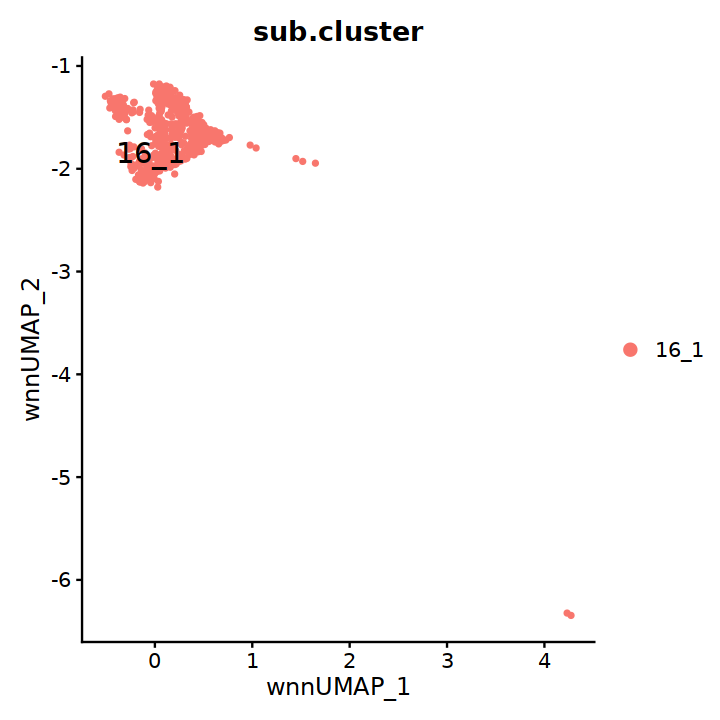

In [42]:
# subcluster to remove low quality cells

sc.num <- c(16) # SET THIS TO WHATEVER CLUSTERS YOU WANT TO SUBCLUSTER

#algo = 4 does not mean 4 clusters it means the 4th out of several algo options 1=leiden, 2=loivain etc 
#to see if the number of clustesr will change you have to change the resolution
#find sub clusters
#adata <- FindSubCluster(adata, cluster=sc.num, algorithm=4, resolution=.5, graph.name='wsnn')
adata <- FindSubCluster1(adata, cluster=sc.num, algorithm=4, resolution=0.25, graph.name='wsnn')
#adata <- FindSubCluster1(adata, cluster=sc.num, algorithm=4, resolution=0.1, graph.name='wsnn')

#adata <- FindSubCluster1(adata, cluster=sc.num, algorithm=4, resolution=0.05, graph.name='wsnn')

options(repr.plot.width=6, repr.plot.height=6)
adata.subset <- subset(adata, subset=seurat_clusters==sc.num)

#print the # cells in each subcluster
cluster_samples <- adata[[]][adata[[]]$seurat_clusters==sc.num,]
table(cluster_samples$sub.cluster)

#plot UMAP of subclusters
p1 <- DimPlot(adata.subset, reduction='umap.wnn', group.by='sub.cluster', label=TRUE, label.size=6, repel=TRUE)
p1



 20_1 20_10 20_11 20_12 20_13 20_14 20_15  20_2  20_3  20_4  20_5  20_6  20_7 
  305    89    82    56    26    19    13   222   141   145   119   114   109 
 20_8  20_9   4_1  4_10  4_11  4_12  4_13  4_14  4_15   4_2   4_3   4_4   4_5 
  122   120   271    81    97    61    25    23    19   224   162   145   150 
  4_6   4_7   4_8   4_9   9_1  9_10  9_11  9_12  9_13  9_14  9_15   9_2   9_3 
  107   104    98   115   290    93    82    50    36    25    16   178   166 
  9_4   9_5   9_6   9_7   9_8   9_9 
  142   123   116   118   115   104 

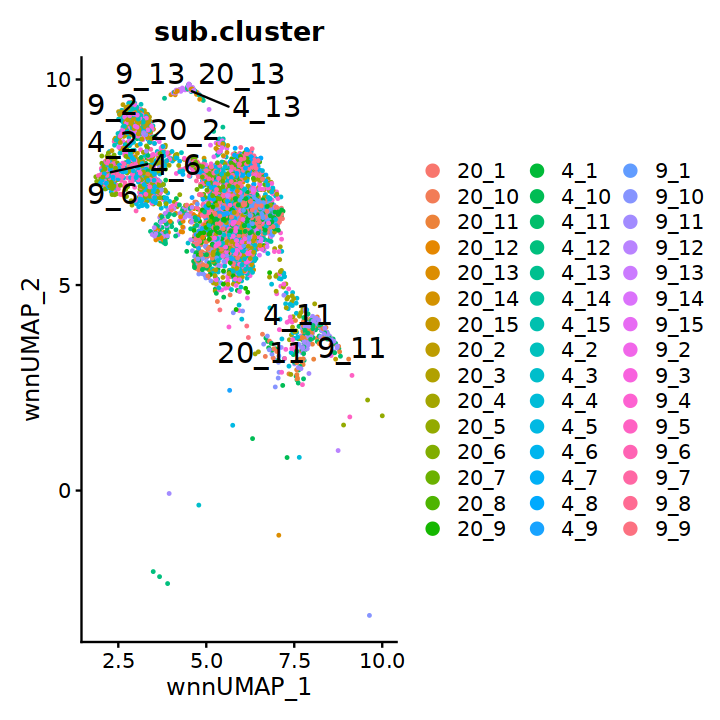

In [49]:
# subcluster to remove low quality cells

sc.num <- c(4,9,20) # SET THIS TO WHATEVER CLUSTERS YOU WANT TO SUBCLUSTER

#algo = 4 does not mean 4 clusters it means the 4th out of several algo options 1=leiden, 2=loivain etc 
#to see if the number of clustesr will change you have to change the resolution
#find sub clusters
adata <- FindSubCluster1(adata, cluster=sc.num, algorithm=4, resolution=0.9, graph.name='wsnn')

options(repr.plot.width=6, repr.plot.height=6)
adata.subset <- subset(adata, subset=seurat_clusters==sc.num)

#print the # cells in each subcluster
cluster_samples <- adata[[]][adata[[]]$seurat_clusters==sc.num,]
table(cluster_samples$sub.cluster)

#plot UMAP of subclusters
p1 <- DimPlot(adata.subset, reduction='umap.wnn', group.by='sub.cluster', label=TRUE, label.size=6, repel=TRUE)
p1


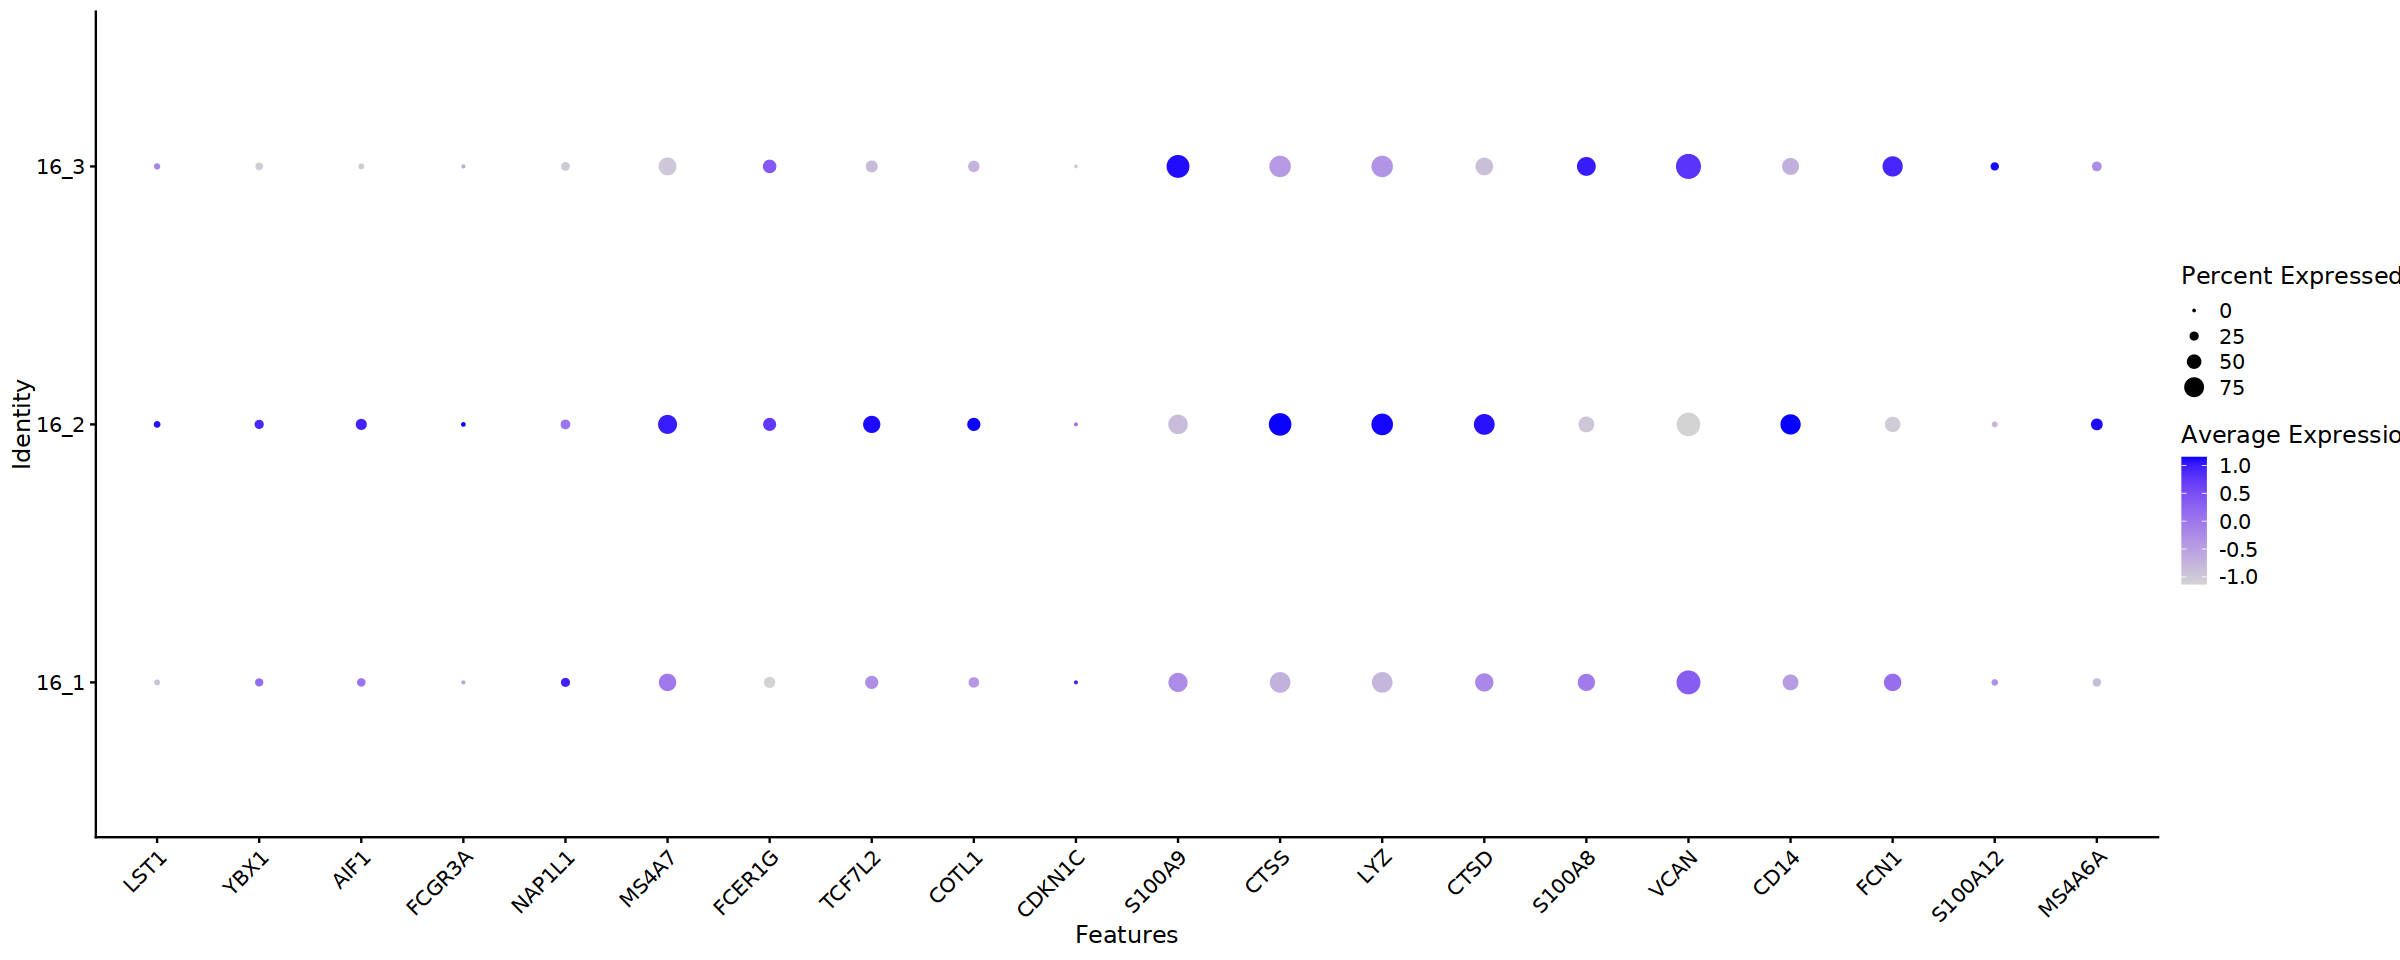

In [41]:
DefaultAssay(adata) <- 'SCT' 

#trying NK sub type markers from Azimuth
#https://azimuth.hubmapconsortium.org/references/human_pbmc/
marker.genes <- c('GNLY', 'TYROBP', 'NKG7', 'FCER1G', 'GZMB', 'TRDC', 'PRF1', 'FGFBP2', 'SPON2', 'KLRF1',
                 #NK
                 'MKI67', 'KLRF1', 'TYMS', 'TRDC', 'TOP2A', 'FCER1G', 'PCLAF', 'CD247', 'CLSPN', 'ASPM',
                 #NK proliferating
                 'XCL2', 'FCER1G', 'SPINK2', 'TRDC', 'KLRC1', 'XCL1', 'SPTSSB', 'PPP1R9A', 'NCAM1', 'TNFRSF11A')
                 #NK bright)

marker.genes <- unique(marker.genes)

options(repr.plot.width=20, repr.plot.height=8)

p1 <- DotPlot(adata.subset, features = marker.genes, group.by = 'sub.cluster') + theme(axis.text.x = element_text(angle = 45, hjust=1))
p1